### 1. 讀取並顯示彩色和灰階圖片

In [67]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import numpy as np
import math

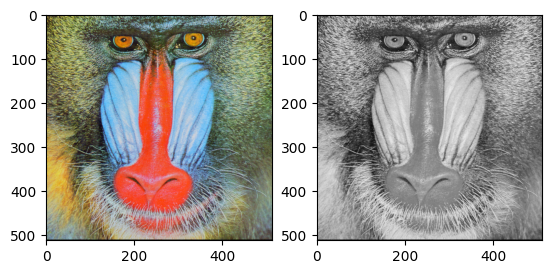

In [68]:
image = plt.imread(r'images\Baboon.tiff')
plt.subplot(121)
plt.imshow(image)

image = iio.imread(r'images\Baboon_Gray.tiff')
plt.subplot(122)
plt.imshow(image, cmap='gray')

plt.show()

### 2. 2進位、10進位轉置

In [69]:
dec2bin = lambda x: f'{x:b}'.rjust(8, '0')
bin2dec = lambda x: int(x, 2)

In [70]:
dec2bin(9)

'00001001'

In [71]:
bin2dec('1001')

9

### 3. 實作LSB嵌入和提取，包成函數 

In [72]:
dec2bin = lambda I, bits: np.array([list(f'{x:b}'.rjust(bits, '0')) for x in I.flatten()]).astype(int)
bin2dec = lambda arr: np.array([int(''.join(map(str, x)), 2) for x in arr])

In [73]:
def LSB_en(I, S):
    I_bin = dec2bin(I, 8)
    for i in range(len(I_bin)):
        I_bin[i][-len(S):] = S
    return bin2dec(I_bin).reshape(I.shape), len(S)

In [74]:
def LSB_de(Im, SLen):
    return dec2bin(Im[0][0], 8)[0][-SLen:]

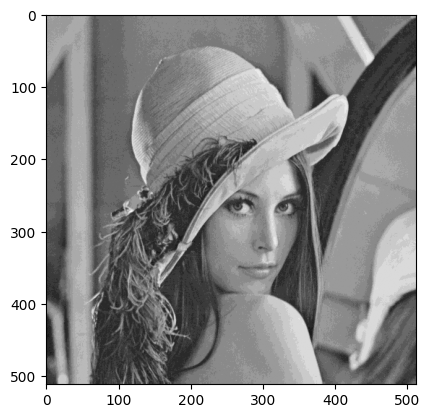

In [75]:
img = iio.imread(r'images\Lena_Gray.tiff')
secret = np.random.randint(2, size=4)
imgM, Slen = LSB_en(img, secret)
plt.imshow(imgM, cmap = 'gray', vmin=0, vmax=255)

In [ ]:
np.array_equal(LSB_de(imgM, 4), secret)

True

### 4. 透過LSB將訊息嵌入圖片，計算PSNR

In [78]:
def get_PSNR(p1, p2):
    MSE = np.sum((p1-p2)**2)/(p1.shape[0]*p1.shape[1])
    return 10 * math.log10(255**2/MSE)

In [79]:
get_PSNR(img, imgM)

33.62868782582162